In [6]:
import json
import matplotlib.pyplot as plt

In [7]:
def load_json(filepath):
    with open(filepath) as f:
        scores = json.load(f)
    return scores

In [8]:
def get_data(scores, key, name):
    data = {'score': [], 'epoch': [], 'name': name}
    for score in scores:
        if key in score.keys():
            data['score'].append(score[key])
            data['epoch'].append(score['epoch_num'])
    return data

In [9]:
def plot_data_by_fold(scores, key, opt_name):
    fig, ax = plt.subplots(figsize=(16,8))
    for score in scores:
        plt.plot(score['epoch'], score['score'], label=score['name'])
    plt.xlabel('epoch')
    plt.ylabel(key)
    plt.title('{} for each fold - {} optimizer'.format(key, opt_name))
    plt.legend()
    plt.savefig('plots/' + key + '_' + opt_name + '_optimizer' + '.png')

In [10]:
def plot_data_by_optimizer(scores, key, fold_n):
    fig, ax = plt.subplots(figsize=(16,8))
    for score in scores:
        plt.plot(score['epoch'], score['score'], label=score['name'])
    plt.xlabel('epoch')
    plt.ylabel(key)
    plt.title('{} for each optimizer - fold {}'.format(key, fold_n))
    plt.legend()
    plt.savefig('plots/' + key + '_fold' + str(fold_n) + '.png')

In [18]:
rename_key_dict = {'total_cost': 'total_cost', 'WT_score': 'whole', 'TC_score': 'core', 'ET_score': 'enhancing', 'name': 'name'}
n_folds = 4
opt_names = ['SGD', 'Momentum + Nesterov', 'adadelta', 'adam']

In [25]:
fold0_path = ['train_log/sgd_lr0.1_fold0/stats.json',
            'train_log/momentum_nesterov_fold0/stats.json',
            #'train_log/RMSProp_default_fold0/stats.json',
            #'train_log/adadelta_lr0.1_fold0/stats.json',
            None,
            'train_log/adam_default_fold0/stats.json']

fold1_path = ['train_log/sgd_lr0.1_fold1/stats.json',
            'train_log/momentum_nesterov_fold1/stats.json',
            #'train_log/RMSProp_centered_fold1/stats.json',
            #'train_log/adadelta_lr0.1_fold1/stats.json',
            None,
            'train_log/adam_default_fold1/stats.json']

fold2_path = ['train_log/sgd_lr0.1_fold2/stats.json',
            'train_log/momentum_nesterov_fold2/stats.json',
            #'train_log/RMSProp_centered_lr0.1_fold2/stats.json',
            'train_log/adadelta_lr1.0_fold2/stats.json']

fold3_path = ['train_log/sgd_lr0.1_fold2/stats.json',
            'train_log/momentum_nesterov_fold2/stats.json']

all_folds_path = [fold0_path, fold1_path, fold2_path, fold3_path]

IndentationError: unexpected indent (<ipython-input-25-9f4f21d478f4>, line 5)

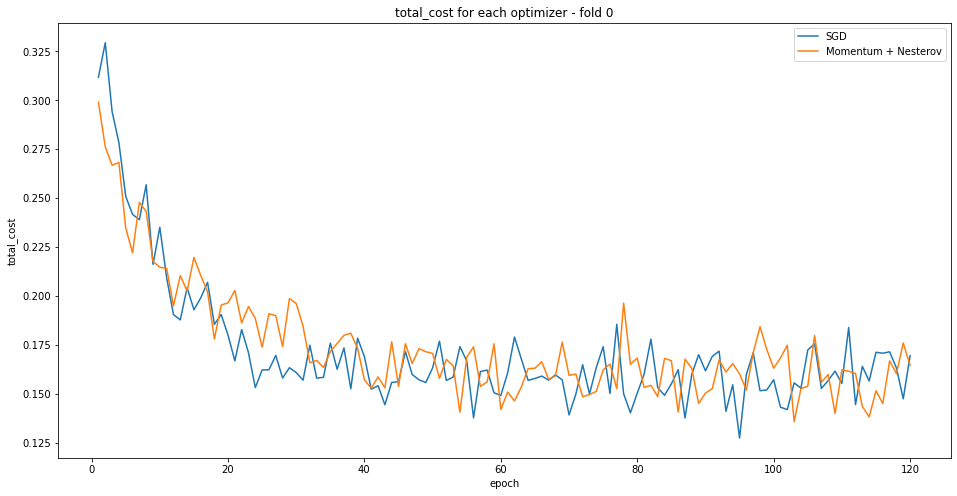

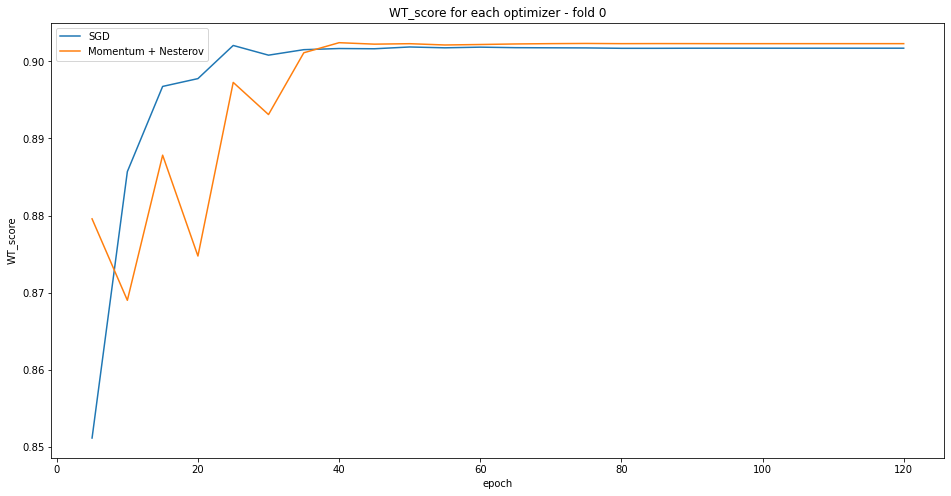

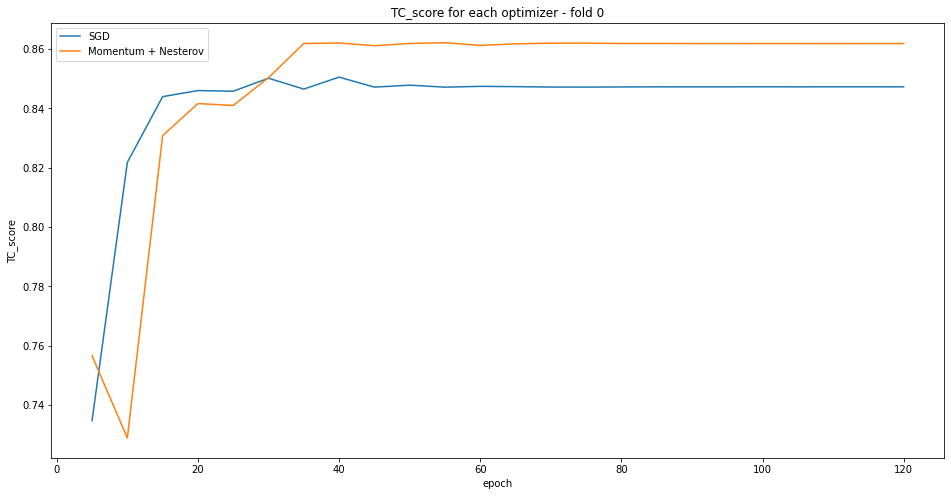

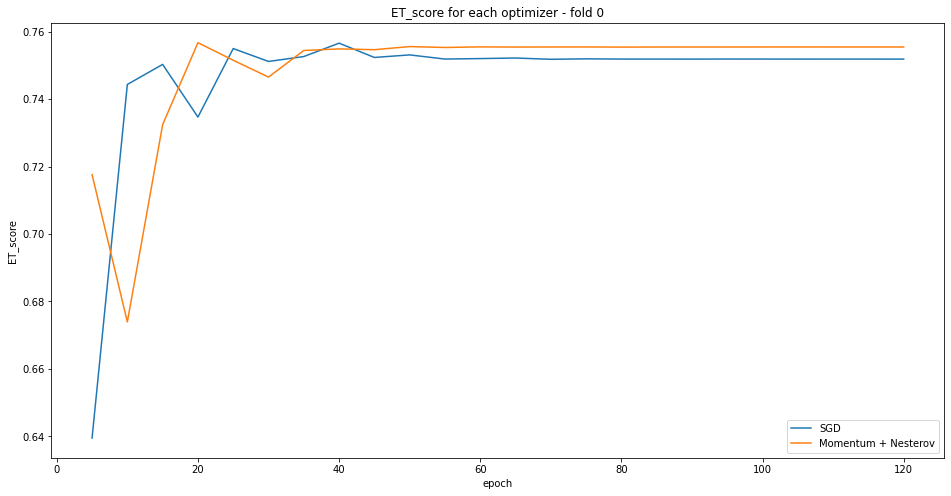

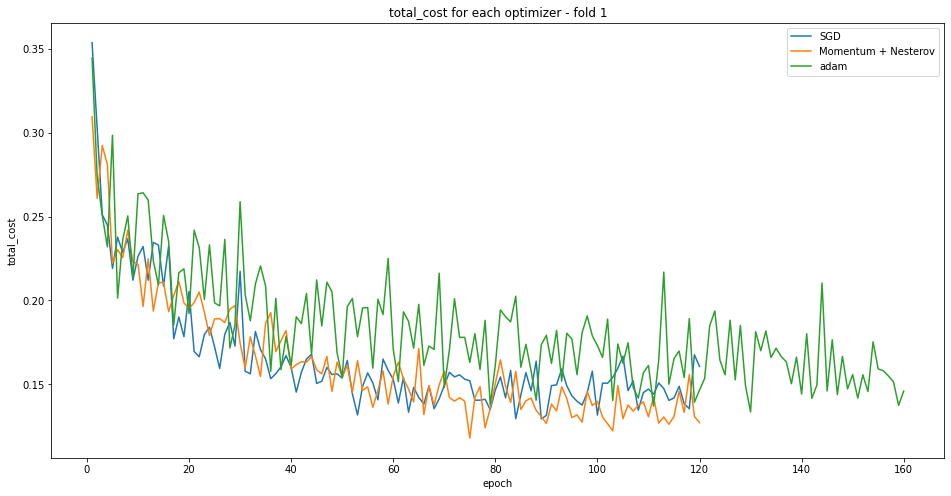

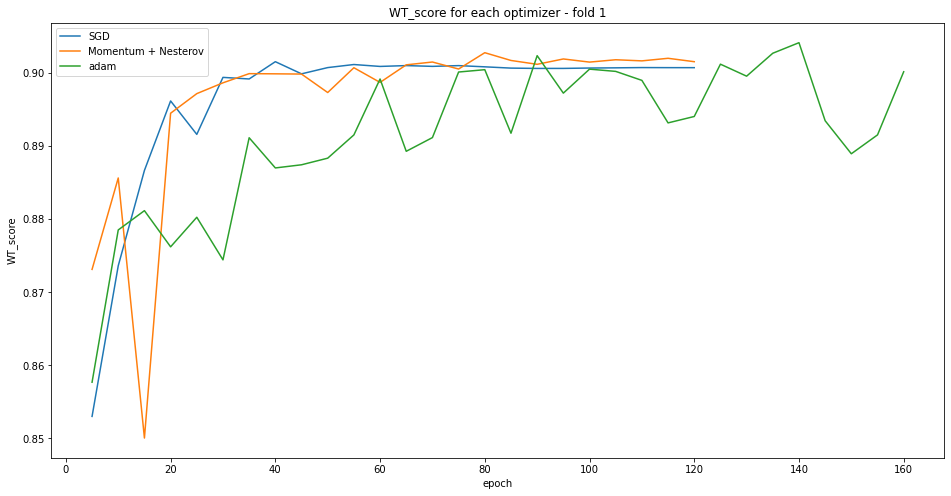

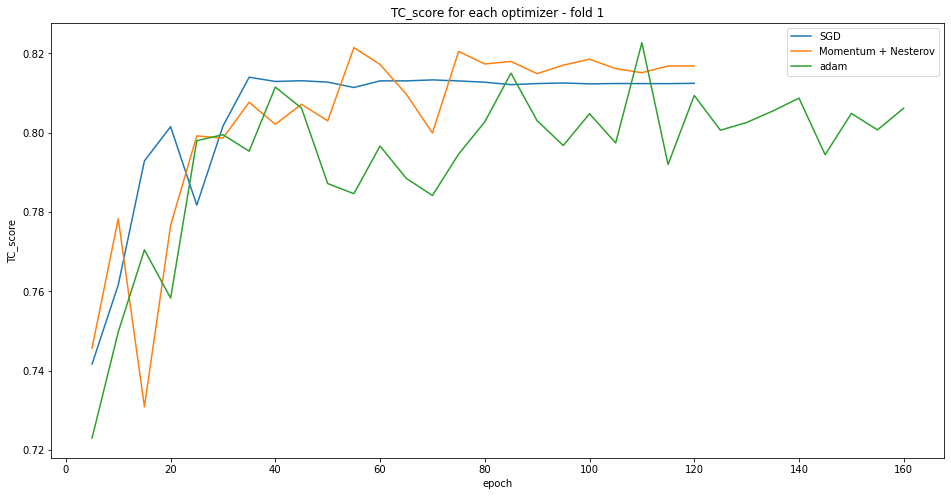

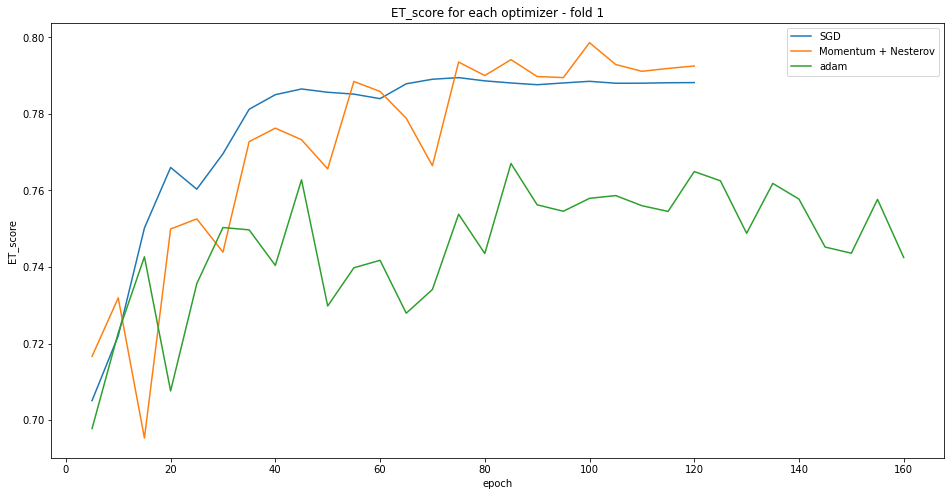

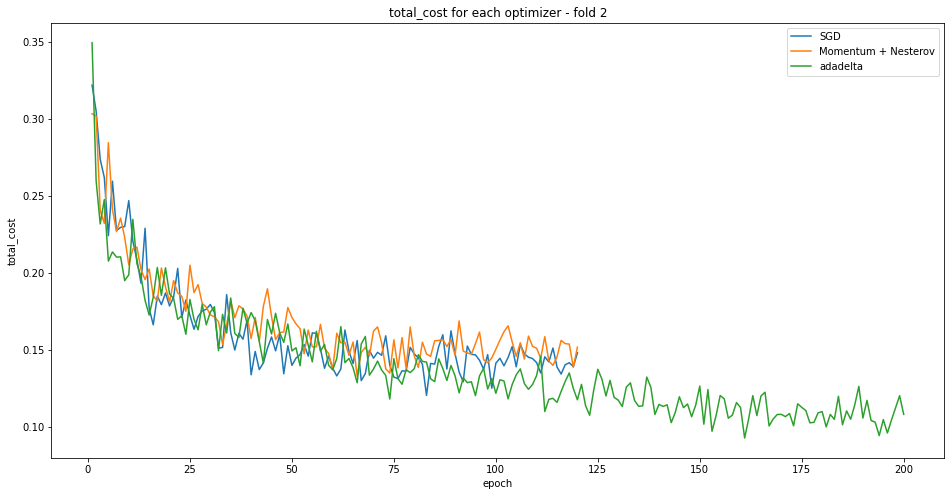

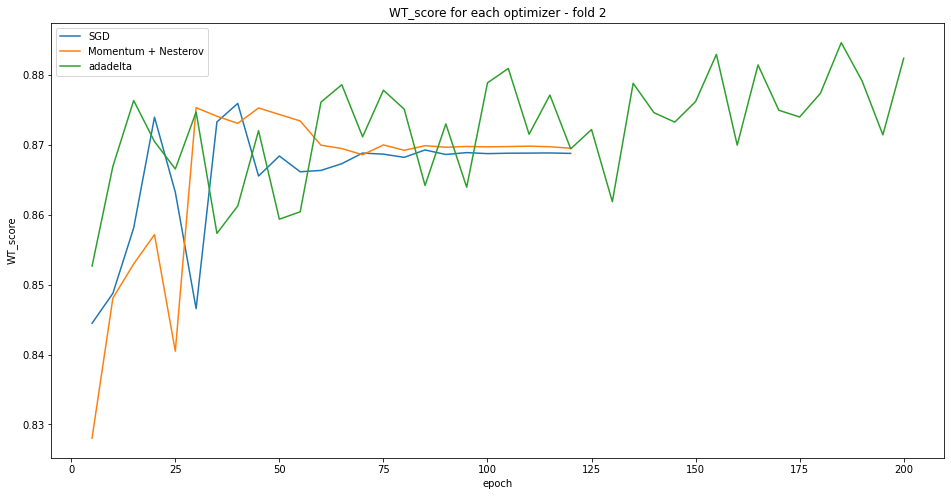

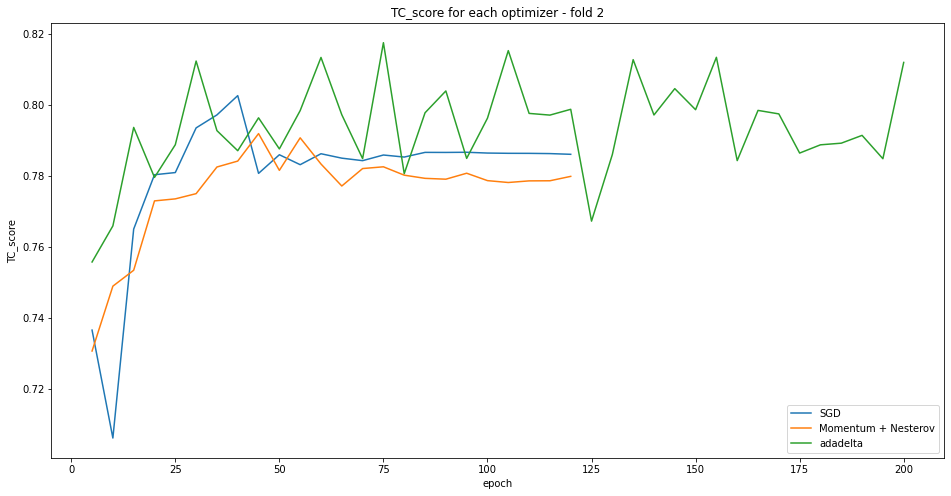

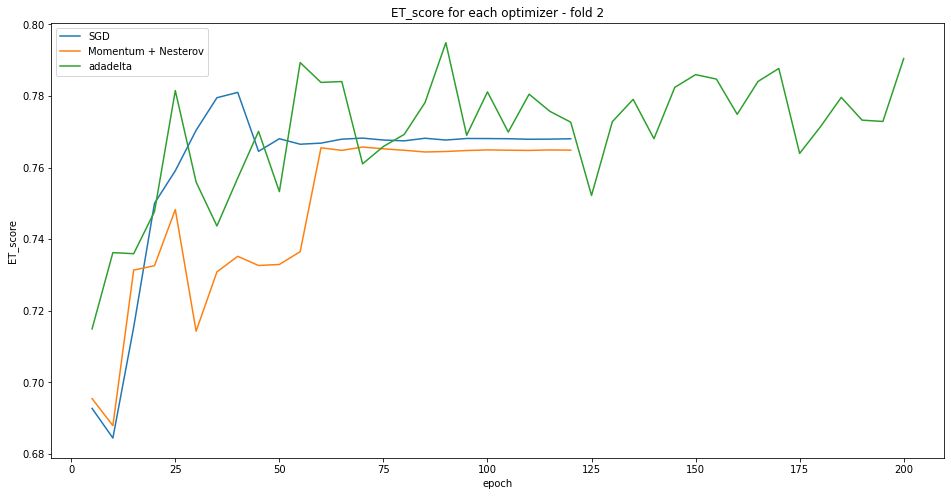

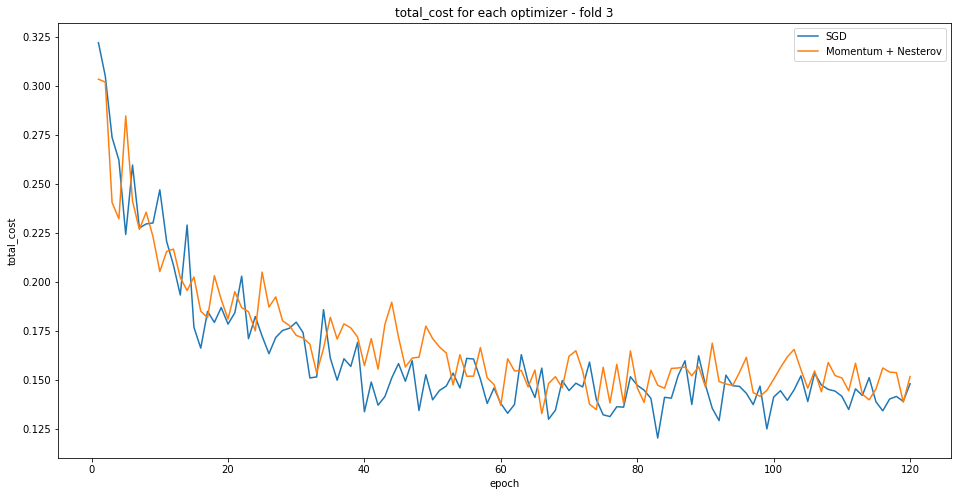

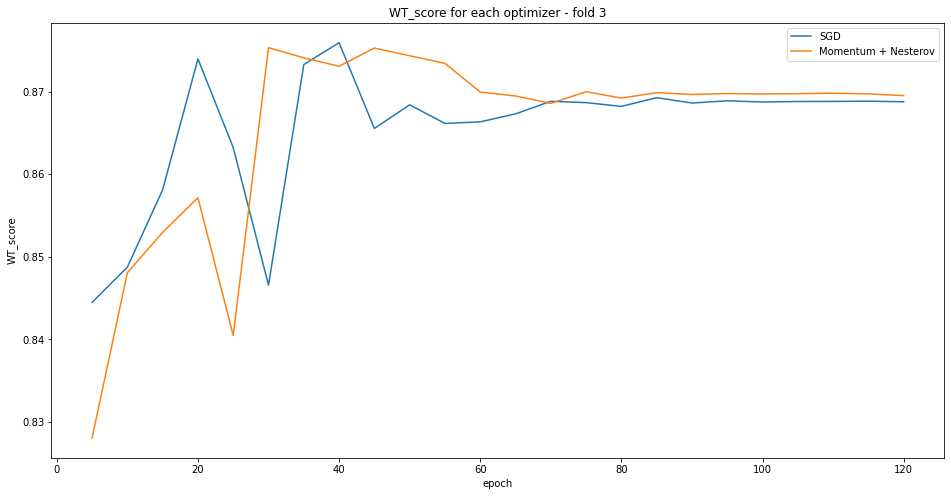

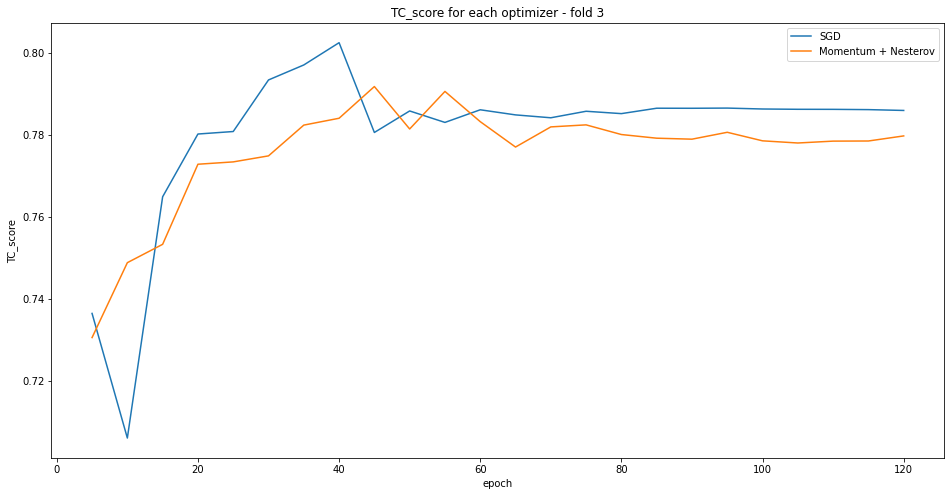

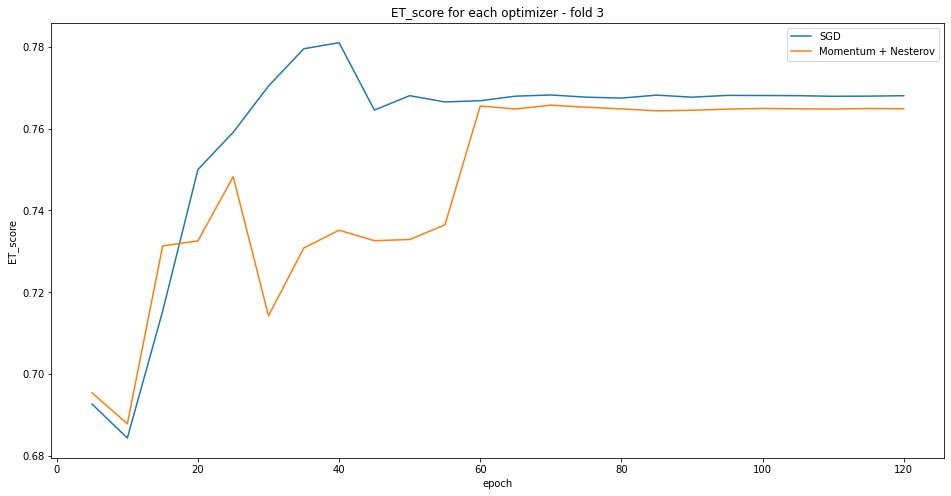

In [26]:
for i, fold_path in enumerate(all_folds_path):
    data = {'total_cost': [], 'WT_score': [], 'TC_score': [], 'ET_score': [], 'name': []}
    for j, filepath in enumerate(fold_path):
        try:
            scores = load_json(filepath)
            for key in data.keys():
                rename_key = rename_key_dict[key]
                data[key].append(get_data(scores, rename_key, opt_names[j]))
        except TypeError:
            continue

    keys = [k for k in data.keys() if k != 'name']
    for key in keys:
        plot_data_by_optimizer(data[key], key, i)

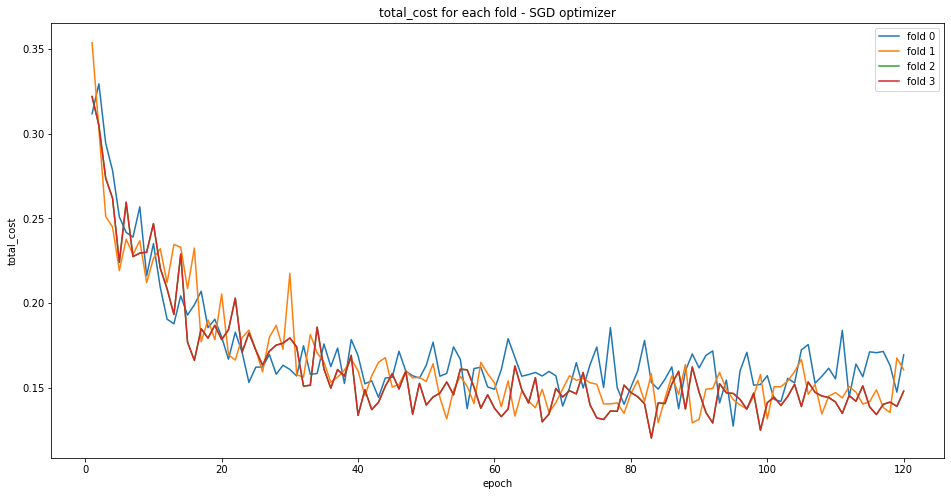

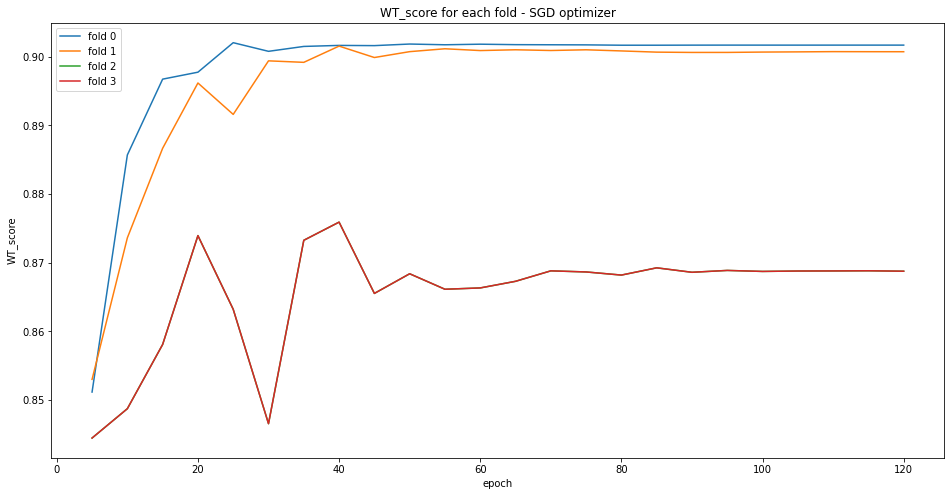

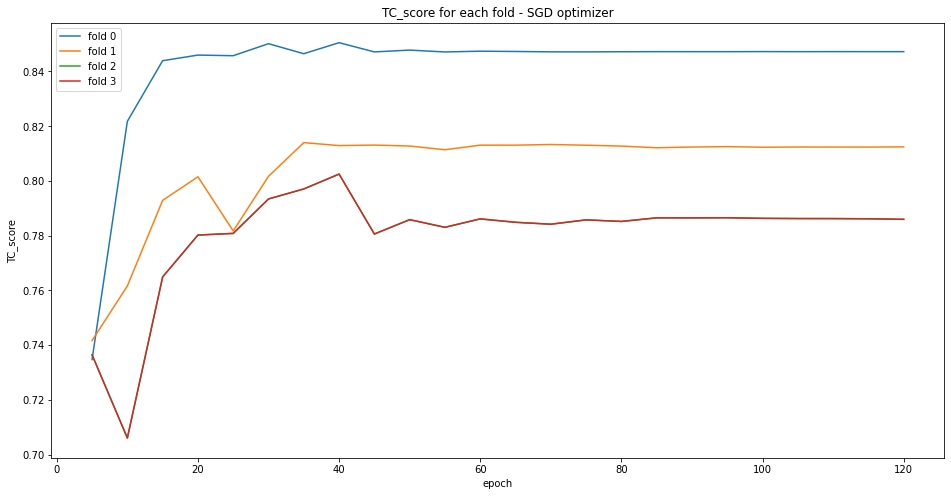

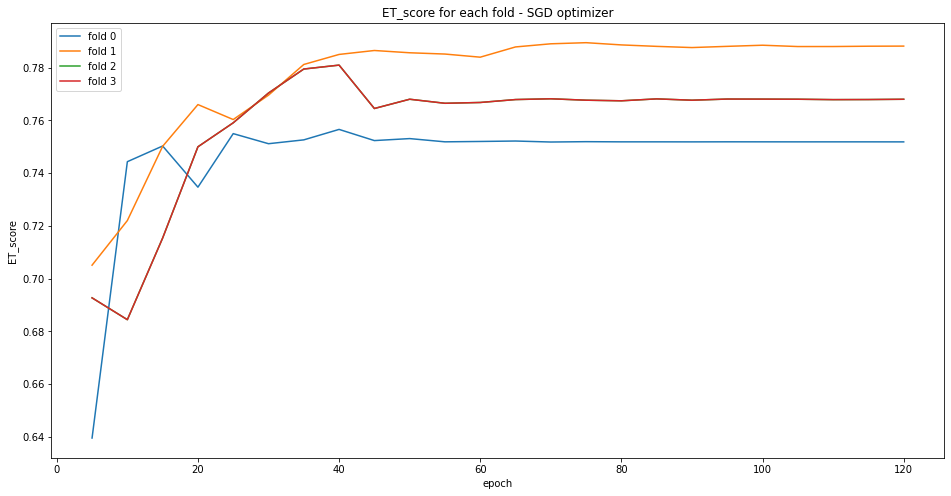

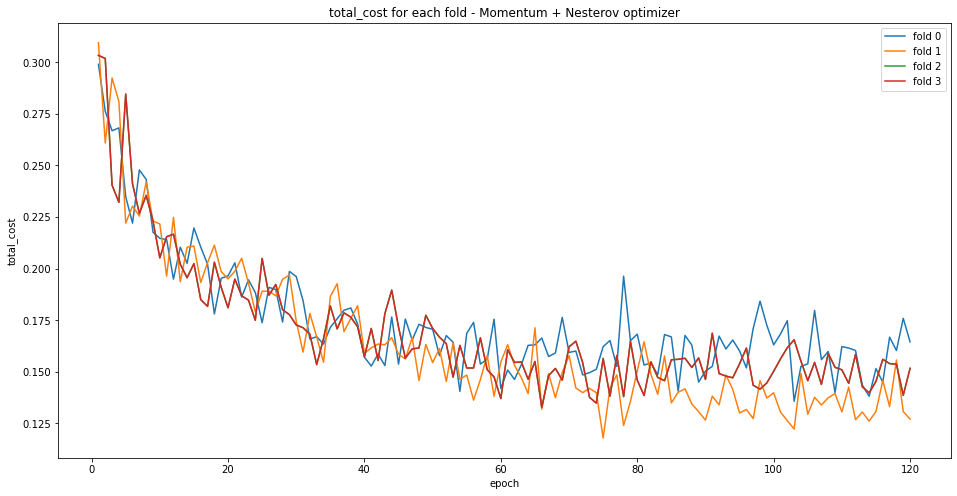

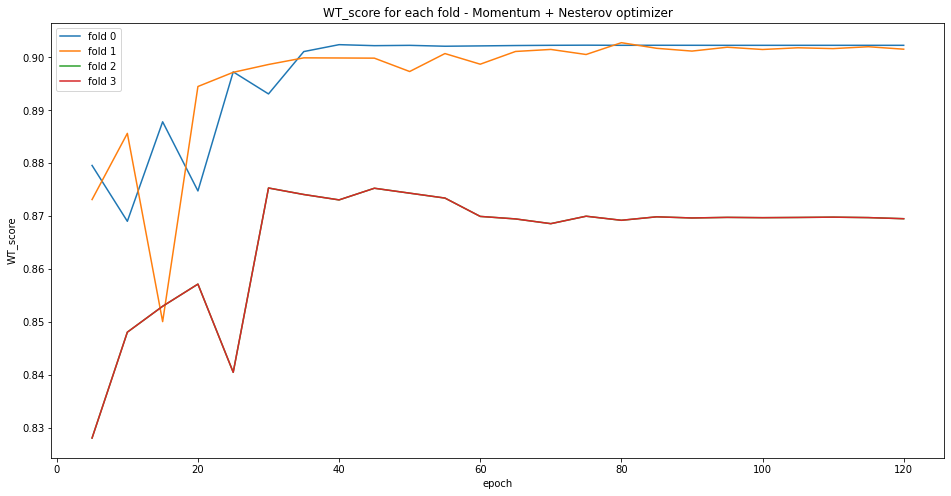

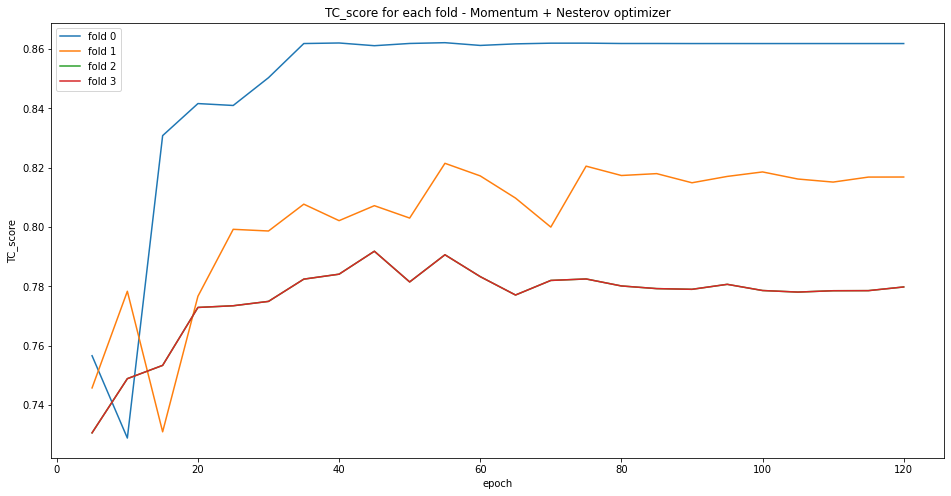

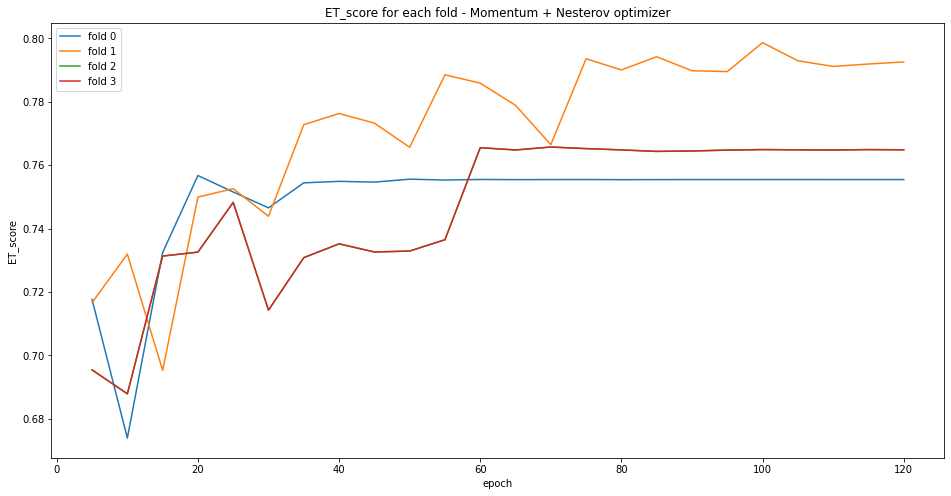

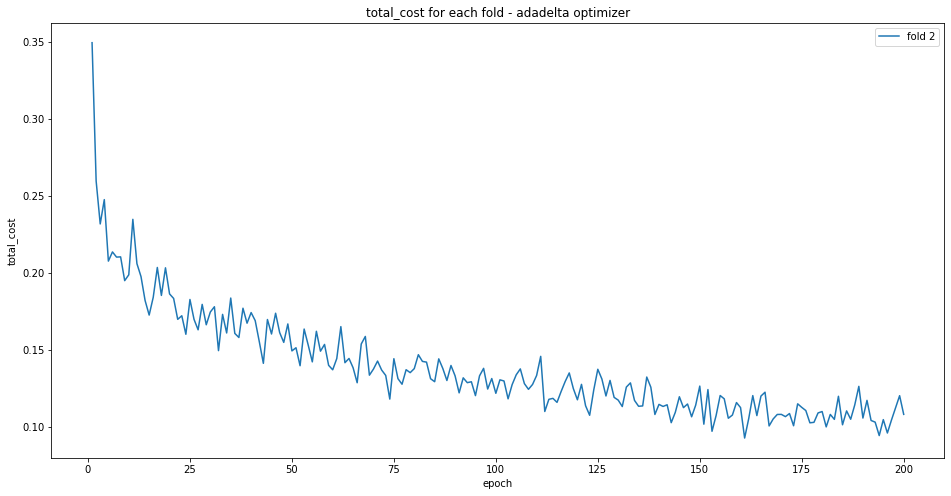

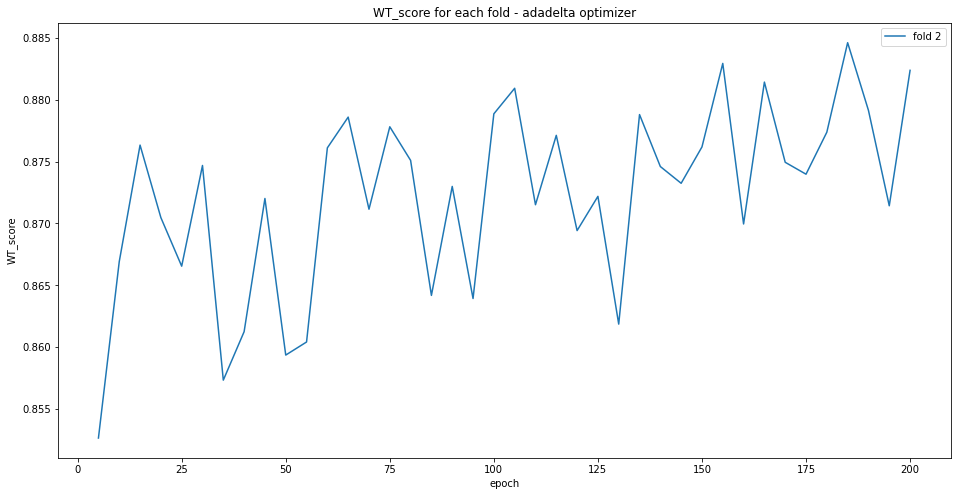

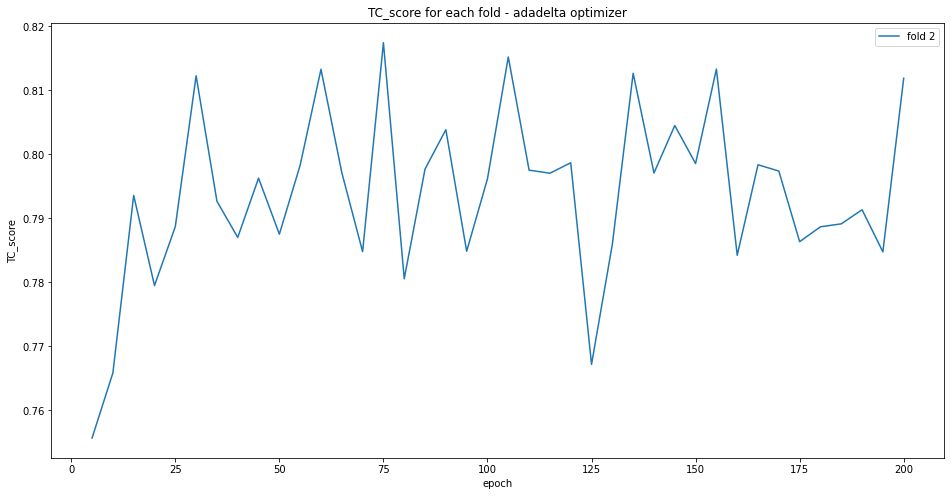

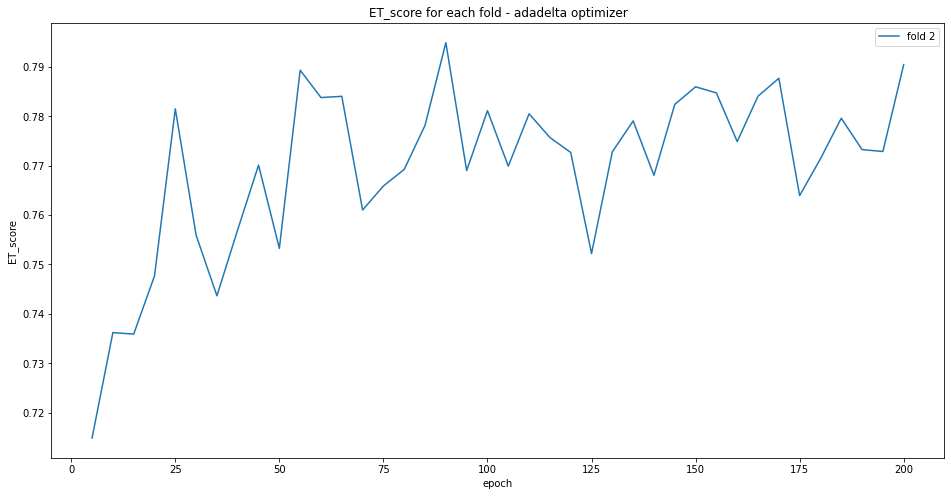

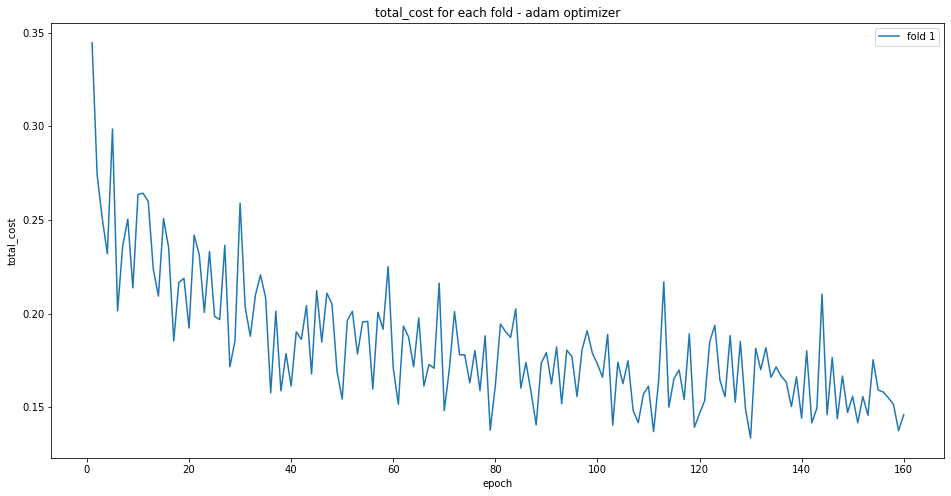

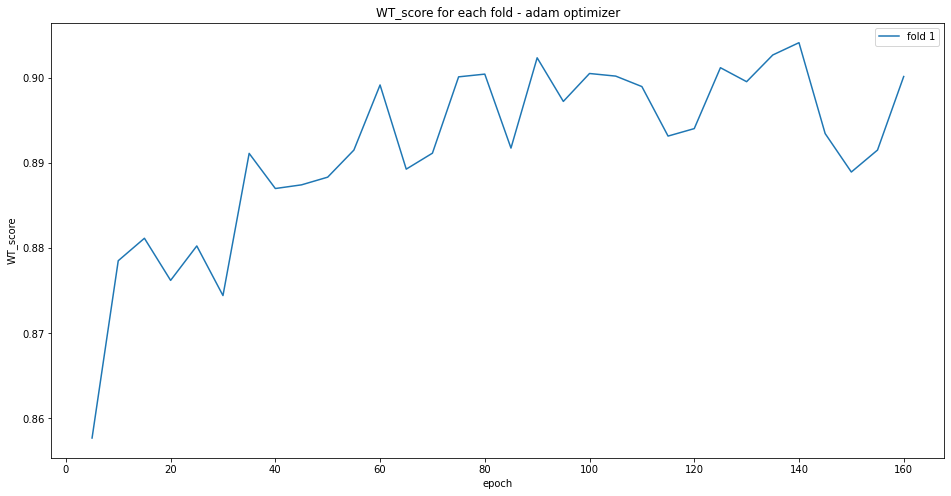

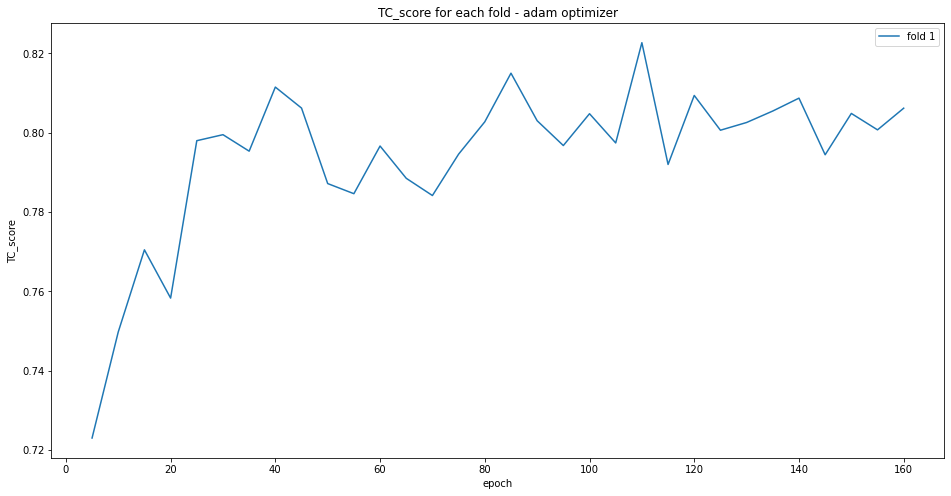

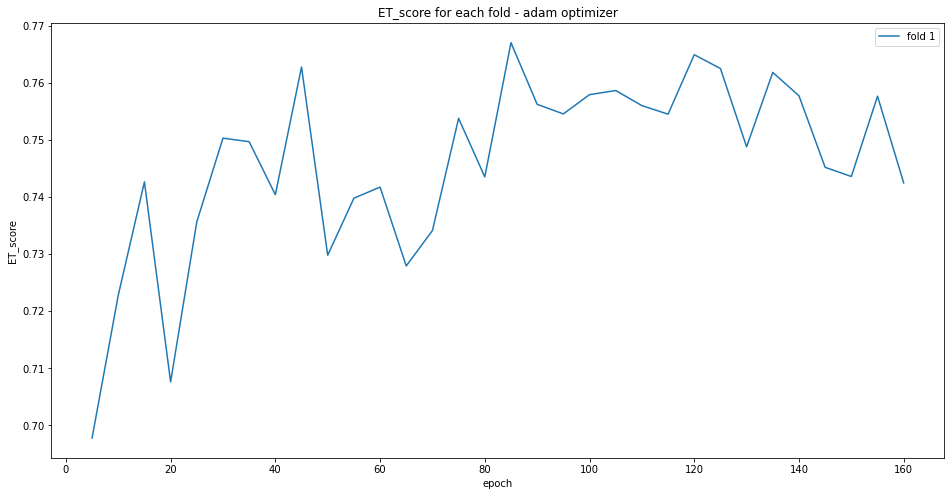

In [27]:
#Plot score between folds for each optimizer
for i, opt_name in enumerate(opt_names):
    data = {'total_cost': [], 'WT_score': [], 'TC_score': [], 'ET_score': [], 'name': []}
    for j in range(n_folds):
        try:
            scores = load_json(all_folds_path[j][i])
            for key in data.keys():
                rename_key = rename_key_dict[key]
                data[key].append(get_data(scores, rename_key, 'fold {}'.format(j)))
        except IndexError:
            continue
        except TypeError:
            continue

    keys = [k for k in data.keys() if k != 'name']
    for key in keys:
        plot_data_by_fold(data[key], key, opt_name)